## Case_study (Bank marketing campaign predict  & Customer Segmentation)

Marketing campaigns are characterized by focusing on customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. Some important aspects of a marketing campaign are as follows:

Segment of the Population: To which segment of the population is the marketing campaign going to address and why? This aspect of the marketing campaign is extremely important since it will tell which part of the population should most likely receive the message of the marketing campaign.

Distribution channel to reach the customer's place: Implementing the most effective strategy in order to get the most out of this marketing campaign. What segment of the population should we address? Which instrument should we use to get our message out? (Ex: Telephones, Radio, TV, Social Media Etc.)

Promotional Strategy: This is the way the strategy is going to be implemented and how are potential clients going to be addressed. This should be the last part of the marketing campaign analysis since there has to be an in-depth analysis of previous campaigns (If possible) in order to learn from previous mistakes and to determine how to make the marketing campaign much more effective.

You are leading the marketing analytics team for a banking institution. There has been a revenue decline for the bank and they would like to know what actions to take. After investigation, it was found that the root cause is that their clients are not depositing as frequently as before. Term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can lend more and thus make more profits. In addition, banks also hold a better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues.

You are provided a dataset containing details of marketing campaigns done via phone with various details for customers such as demographics, last campaign details etc. 
 1) Can you help the bank to predict accurately whether the customer will subscribe to the focus product for the campaign - Term Deposit after the campaign?
 2)  make Customer Segmentation

### dataset source : kaggel (https://www.kaggle.com/datasets/kunalgupta2616/hackerearth-customer-segmentation-hackathon)

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from datasist.structdata import detect_outliers
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('Train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().mean()*100

id                                   0.000000
customer_age                         1.955952
job_type                             0.000000
marital                              0.473979
education                            0.000000
default                              0.000000
balance                              1.260783
housing_loan                         0.000000
personal_loan                        0.470819
communication_type                   0.000000
day_of_month                         0.000000
month                                0.000000
last_contact_duration                0.982716
num_contacts_in_campaign             0.353904
days_since_prev_campaign_contact    81.622271
num_contacts_prev_campaign           0.000000
prev_campaign_outcome                0.000000
term_deposit_subscribed              0.000000
dtype: float64

all missing values will handel in pipline by using k imputer in next notebook

In [ ]:
df['id'].value_counts()

id_43823    1
id_34263    1
id_6392     1
id_3082     1
id_43162    1
           ..
id_2813     1
id_13538    1
id_1238     1
id_825      1
id_1723     1
Name: id, Length: 31647, dtype: int64

In [ ]:
df.drop('id', axis=1,inplace=True)

the column('id')high variance so we drop it 

In [ ]:
df.drop('days_since_prev_campaign_contact', axis=1,inplace=True)

the column ('days_since_prev_campaign_contact') has null values above 80% so we drop it 

# # univariant analysis

### for cat. col.

In [ ]:
df.select_dtypes('object').columns 

Index(['job_type', 'marital', 'education', 'default', 'housing_loan',
       'personal_loan', 'communication_type', 'month',
       'prev_campaign_outcome'],
      dtype='object')

In [ ]:
df['job_type'].value_counts()

blue-collar      6816
management       6666
technician       5220
admin.           3627
services         2923
retired          1591
self-employed    1111
entrepreneur     1037
unemployed        901
housemaid         893
student           663
unknown           199
Name: job_type, dtype: int64

In [ ]:
df['marital'].value_counts()

married     18945
single       8857
divorced     3695
Name: marital, dtype: int64

In [ ]:
df['education'].value_counts()

secondary    16247
tertiary      9321
primary       4787
unknown       1292
Name: education, dtype: int64

In [ ]:
df['default'].value_counts()

no     31094
yes      553
Name: default, dtype: int64

In [ ]:
df['housing_loan'].value_counts()

yes    17700
no     13947
Name: housing_loan, dtype: int64

In [ ]:
df['personal_loan'].value_counts()

no     26463
yes     5035
Name: personal_loan, dtype: int64

In [ ]:
df['communication_type'].value_counts()

cellular     20480
unknown       9151
telephone     2016
Name: communication_type, dtype: int64

In [ ]:
df['month'].value_counts()

may    9685
jul    4786
aug    4308
jun    3746
nov    2801
apr    2111
feb    1836
jan     953
oct     510
sep     417
mar     338
dec     156
Name: month, dtype: int64

In [ ]:
df['prev_campaign_outcome'].value_counts()

unknown    25833
failure     3472
other       1272
success     1070
Name: prev_campaign_outcome, dtype: int64

In [ ]:
df['term_deposit_subscribed'].value_counts()   #target 1:8

0    28253
1     3394
Name: term_deposit_subscribed, dtype: int64

In [ ]:
df['day_of_month'].value_counts()

20    1944
18    1615
21    1414
17    1366
6     1342
5     1336
14    1294
8     1276
7     1269
28    1268
19    1249
29    1240
15    1201
12    1122
9     1101
30    1087
13    1080
11    1062
4     1009
16     985
2      885
27     780
3      767
26     715
23     670
22     618
25     583
31     469
10     353
24     312
1      235
Name: day_of_month, dtype: int64

<AxesSubplot:xlabel='day_of_month', ylabel='count'>

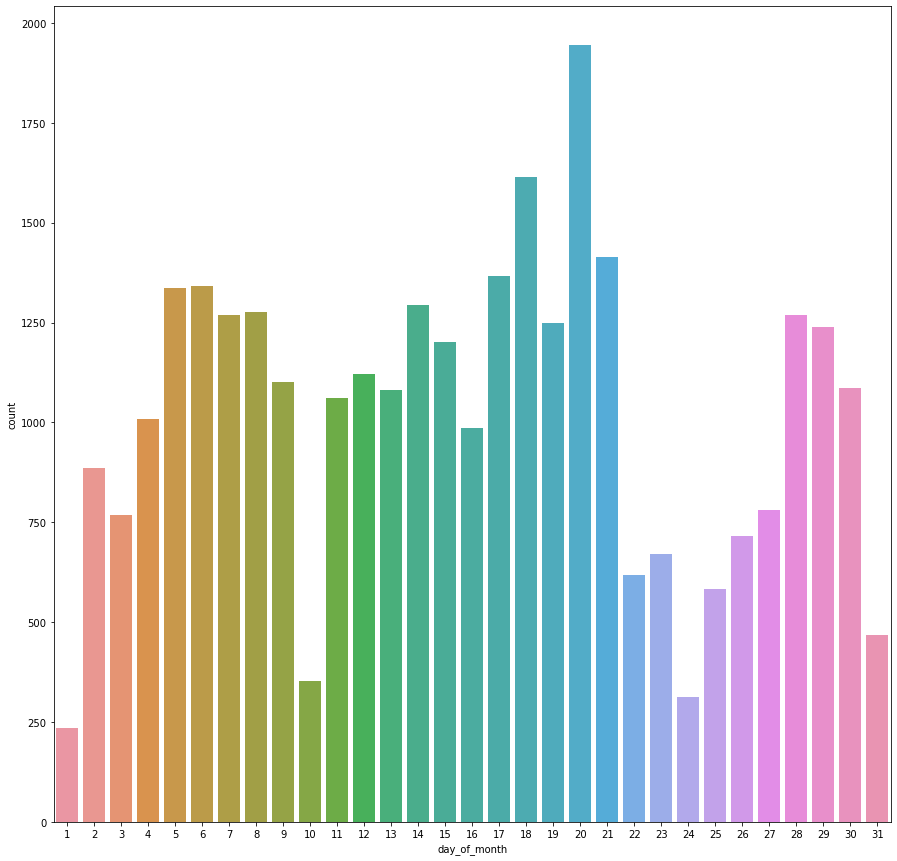

In [ ]:
plt.figure(figsize = (15, 15))
sns.countplot(data=df , x= 'day_of_month')

### for numrical col.

In [ ]:
df.select_dtypes('number').columns

Index(['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'term_deposit_subscribed'],
      dtype='object')

In [ ]:
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
count,31028.000000,31248.000000,31647.000000,31336.000000,31535.000000,31647.000000,31647.000000
mean,40.439216,1368.112615,15.818561,256.184038,2.776629,0.591620,0.107246
std,10.751392,3085.342417,8.322970,256.181479,3.153293,2.499675,0.309430
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,0.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,0.000000,0.000000
75%,48.000000,1413.000000,21.000000,315.250000,3.000000,0.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,275.000000,1.000000


In [ ]:
num_col=['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign','num_contacts_prev_campaign']

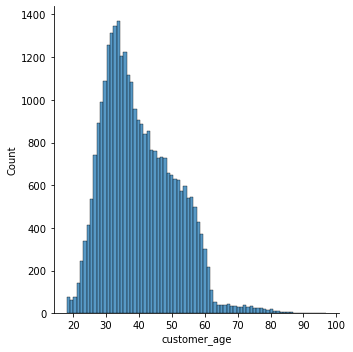

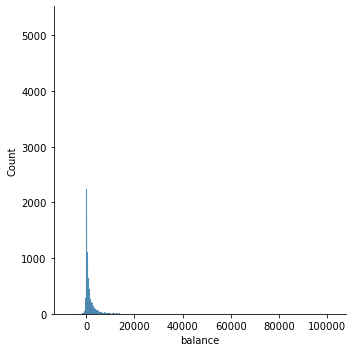

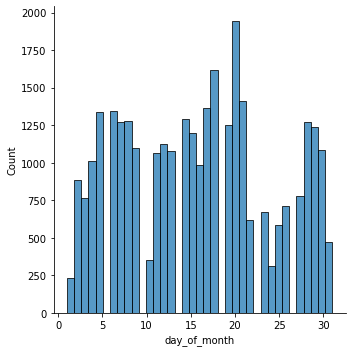

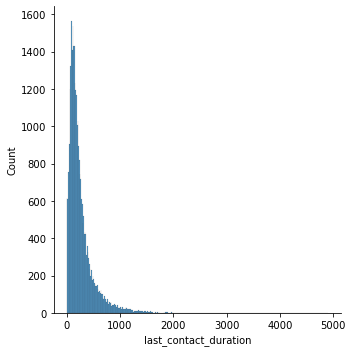

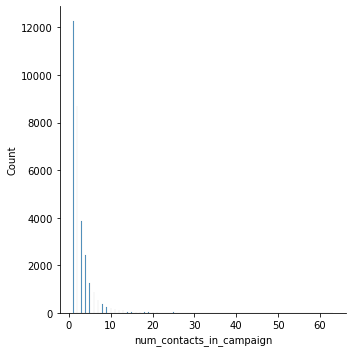

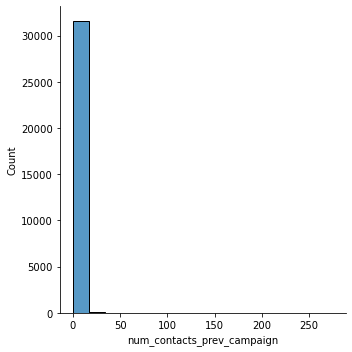

In [ ]:
for col in num_col:
    sns.displot(data = df , x = col )

In [ ]:
df['customer_age'].describe()  

count    31028.000000
mean        40.439216
std         10.751392
min         18.000000
25%         32.000000
50%         39.000000
75%         48.000000
max         97.000000
Name: customer_age, dtype: float64

<AxesSubplot:xlabel='customer_age'>

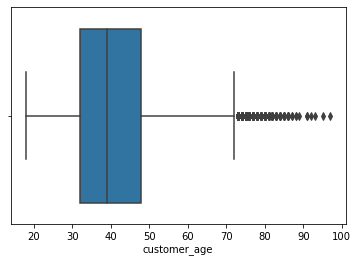

In [ ]:
sns.boxplot(data = df ,x ='customer_age')

In [ ]:
df[(df['customer_age']>75)& df['term_deposit_subscribed']==1]

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
261,78.0,retired,married,secondary,no,8303.0,no,no,telephone,9,jun,730.0,1.0,12,failure,1
302,76.0,retired,married,secondary,no,2656.0,no,no,cellular,10,nov,261.0,5.0,0,unknown,1
620,88.0,retired,married,primary,no,5235.0,no,no,telephone,1,apr,568.0,2.0,0,unknown,1
981,77.0,retired,married,primary,no,29337.0,no,no,cellular,15,mar,250.0,1.0,2,other,1
2547,77.0,retired,married,primary,no,8554.0,no,no,telephone,18,jan,311.0,2.0,2,success,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28600,80.0,retired,married,primary,no,992.0,no,no,cellular,29,oct,753.0,2.0,1,other,1
28604,84.0,retired,divorced,primary,no,7610.0,no,no,cellular,18,feb,341.0,3.0,0,unknown,1
29193,78.0,retired,married,secondary,no,663.0,no,no,telephone,2,jul,367.0,1.0,0,unknown,1
29207,83.0,retired,married,primary,no,12110.0,no,no,telephone,12,feb,158.0,2.0,0,unknown,1


we can not remove age outliers cause they rapresent an important busisniess value 

In [ ]:
df['balance'].describe()  

count     31248.000000
mean       1368.112615
std        3085.342417
min       -8020.000000
25%          72.000000
50%         449.000000
75%        1413.000000
max      102128.000000
Name: balance, dtype: float64

<AxesSubplot:xlabel='balance'>

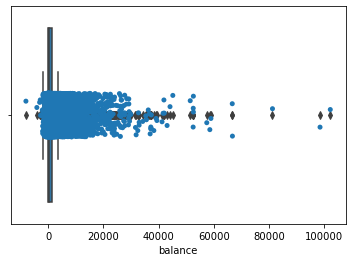

In [ ]:
sns.boxplot(data = df ,x ='balance')
sns.stripplot(data = df ,x ='balance')

it's clear that balance has outliers and also have negative values it doesn't make sense

In [ ]:
df[(df['balance']<0)]

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
17,41.0,technician,married,secondary,no,-3.0,yes,no,cellular,16,apr,138.0,1.0,1,failure,0
18,41.0,services,married,secondary,no,-145.0,no,yes,unknown,6,jun,201.0,1.0,0,unknown,0
19,53.0,retired,divorced,secondary,yes,-204.0,no,yes,unknown,6,jun,176.0,1.0,0,unknown,0
36,36.0,admin.,married,secondary,no,-327.0,yes,no,cellular,29,jul,117.0,8.0,0,unknown,0
45,29.0,blue-collar,married,primary,no,-334.0,no,no,cellular,10,jul,136.0,6.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31594,42.0,technician,married,secondary,no,-247.0,no,yes,unknown,26,may,68.0,1.0,0,unknown,0
31596,47.0,technician,married,secondary,no,-58.0,yes,no,cellular,16,apr,178.0,2.0,0,unknown,0
31603,42.0,blue-collar,married,secondary,no,-103.0,yes,no,unknown,6,may,94.0,2.0,0,unknown,0
31619,54.0,blue-collar,divorced,primary,yes,-2.0,no,no,cellular,18,jul,307.0,3.0,0,unknown,0


In [ ]:
df[(df['balance']<0)&(df['term_deposit_subscribed']==1)]

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
199,33.0,technician,single,secondary,yes,-483.0,yes,no,cellular,17,apr,1065.0,1.0,0,unknown,1
286,56.0,blue-collar,married,primary,no,-544.0,no,no,cellular,25,aug,1170.0,6.0,0,unknown,1
378,47.0,technician,divorced,secondary,no,-4.0,no,no,cellular,29,sep,165.0,1.0,2,failure,1
805,65.0,self-employed,married,tertiary,no,-40.0,no,no,cellular,1,apr,380.0,2.0,0,unknown,1
830,42.0,technician,married,tertiary,no,-4.0,no,no,cellular,4,aug,1501.0,2.0,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30727,38.0,management,married,tertiary,no,-5.0,no,no,telephone,27,aug,646.0,9.0,0,unknown,1
30811,54.0,technician,married,secondary,no,-4.0,no,no,telephone,5,feb,754.0,3.0,0,unknown,1
31297,31.0,services,single,primary,no,-3.0,yes,yes,cellular,19,nov,685.0,1.0,0,unknown,1
31337,55.0,technician,married,secondary,no,-318.0,no,yes,cellular,10,jul,2020.0,1.0,0,unknown,1


In [ ]:
df[(df['balance']<0)&((df['housing_loan']=='yes')|(df['personal_loan']=='yes'))]

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
17,41.0,technician,married,secondary,no,-3.0,yes,no,cellular,16,apr,138.0,1.0,1,failure,0
18,41.0,services,married,secondary,no,-145.0,no,yes,unknown,6,jun,201.0,1.0,0,unknown,0
19,53.0,retired,divorced,secondary,yes,-204.0,no,yes,unknown,6,jun,176.0,1.0,0,unknown,0
36,36.0,admin.,married,secondary,no,-327.0,yes,no,cellular,29,jul,117.0,8.0,0,unknown,0
46,42.0,admin.,single,secondary,no,-495.0,yes,yes,unknown,23,may,131.0,1.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31592,38.0,technician,married,secondary,no,-183.0,no,yes,unknown,17,jun,203.0,3.0,0,unknown,0
31594,42.0,technician,married,secondary,no,-247.0,no,yes,unknown,26,may,68.0,1.0,0,unknown,0
31596,47.0,technician,married,secondary,no,-58.0,yes,no,cellular,16,apr,178.0,2.0,0,unknown,0
31603,42.0,blue-collar,married,secondary,no,-103.0,yes,no,unknown,6,may,94.0,2.0,0,unknown,0


In [ ]:
df[((df['balance']<0)&((df['housing_loan']=='yes')|(df['personal_loan']=='yes')))& (df['default']=='yes')]

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
19,53.0,retired,divorced,secondary,yes,-204.0,no,yes,unknown,6,jun,176.0,1.0,0,unknown,0
199,33.0,technician,single,secondary,yes,-483.0,yes,no,cellular,17,apr,1065.0,1.0,0,unknown,1
306,35.0,management,married,tertiary,yes,-1.0,yes,yes,cellular,21,nov,73.0,1.0,0,unknown,0
318,33.0,blue-collar,single,unknown,yes,-528.0,yes,no,unknown,7,may,151.0,1.0,0,unknown,0
323,NaN,blue-collar,divorced,unknown,yes,-273.0,yes,yes,unknown,23,may,440.0,2.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31088,34.0,services,married,secondary,yes,-184.0,yes,no,cellular,8,may,277.0,2.0,0,unknown,0
31241,41.0,blue-collar,married,primary,yes,-4.0,yes,no,unknown,6,may,63.0,2.0,0,unknown,0
31471,31.0,management,single,secondary,yes,-170.0,yes,no,unknown,15,may,144.0,5.0,0,unknown,0
31521,27.0,entrepreneur,married,secondary,yes,-389.0,yes,no,cellular,18,jul,396.0,3.0,0,unknown,0


In [ ]:
df[df['balance']==0]

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
32,37.0,management,married,secondary,no,0.0,no,no,cellular,12,aug,126.0,2.0,0,unknown,0
66,35.0,services,married,secondary,no,0.0,yes,no,cellular,12,jun,110.0,4.0,6,failure,0
71,40.0,services,married,secondary,no,0.0,yes,no,cellular,31,jul,25.0,20.0,0,unknown,0
102,32.0,management,married,tertiary,no,0.0,no,no,cellular,22,aug,206.0,4.0,0,unknown,0
157,56.0,admin.,married,unknown,no,0.0,yes,no,cellular,17,nov,206.0,1.0,2,failure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31161,43.0,entrepreneur,married,tertiary,no,0.0,yes,yes,cellular,15,jul,76.0,2.0,0,unknown,0
31225,40.0,blue-collar,divorced,secondary,no,0.0,yes,no,cellular,11,may,565.0,1.0,1,failure,0
31248,40.0,blue-collar,single,secondary,no,0.0,no,no,cellular,22,jul,880.0,4.0,0,unknown,1
31404,60.0,blue-collar,married,primary,no,0.0,no,no,telephone,16,jul,552.0,6.0,0,unknown,0


In [ ]:
df[df['balance'].isnull()==True]

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
55,41.0,management,married,secondary,no,NaN,yes,no,unknown,13,may,76.0,1.0,0,unknown,0
115,62.0,admin.,married,secondary,no,NaN,no,no,cellular,22,dec,170.0,1.0,9,success,1
328,40.0,blue-collar,married,secondary,no,NaN,yes,yes,unknown,20,may,263.0,1.0,0,unknown,0
520,46.0,blue-collar,married,secondary,no,NaN,yes,no,cellular,29,aug,62.0,10.0,0,unknown,0
682,28.0,blue-collar,married,primary,no,NaN,yes,no,unknown,9,may,296.0,1.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31264,35.0,management,single,tertiary,no,NaN,yes,no,cellular,8,oct,85.0,2.0,0,unknown,0
31299,32.0,technician,married,unknown,no,NaN,no,no,unknown,19,may,99.0,1.0,0,unknown,0
31321,57.0,retired,married,secondary,no,NaN,no,no,unknown,9,jun,84.0,2.0,0,unknown,0
31512,38.0,housemaid,married,primary,no,NaN,no,no,cellular,13,aug,154.0,2.0,0,unknown,0


In [ ]:
df['last_contact_duration'].describe()

count    31336.000000
mean       256.184038
std        256.181479
min          0.000000
25%        103.000000
50%        179.000000
75%        315.250000
max       4900.000000
Name: last_contact_duration, dtype: float64

<AxesSubplot:xlabel='last_contact_duration', ylabel='Density'>

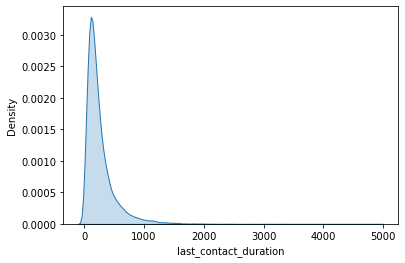

In [ ]:
sns.kdeplot(data = df , x = 'last_contact_duration', shade = True)

<AxesSubplot:xlabel='last_contact_duration'>

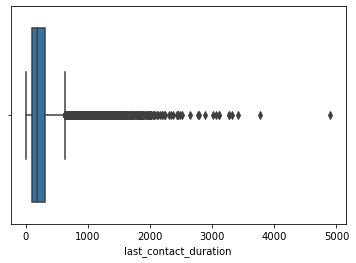

In [ ]:
sns.boxplot(data = df ,x ='last_contact_duration')

In [ ]:
df['num_contacts_in_campaign'].sort_index(ascending=False).value_counts()  #Number of contacts performed during this campaign for this client

1.0     12270
2.0      8678
3.0      3845
4.0      2437
5.0      1256
6.0       871
7.0       524
8.0       374
9.0       235
10.0      188
11.0      145
12.0      112
13.0      110
14.0       57
16.0       56
15.0       54
17.0       53
20.0       32
19.0       31
18.0       30
21.0       21
25.0       19
23.0       16
24.0       15
22.0       13
28.0       13
29.0       12
26.0        9
32.0        8
31.0        7
27.0        7
30.0        6
33.0        5
34.0        4
43.0        3
36.0        3
38.0        3
35.0        3
37.0        2
41.0        2
44.0        1
58.0        1
55.0        1
51.0        1
46.0        1
63.0        1
Name: num_contacts_in_campaign, dtype: int64

In [ ]:
df['num_contacts_prev_campaign'].value_counts()   #Number of contacts performed before this campaign for this client

0      25831
1       1938
2       1507
3        806
4        500
5        311
6        188
7        148
8         91
9         62
10        48
11        46
12        34
13        28
14        15
15        14
17        11
20         7
19         7
23         6
16         6
22         5
18         5
24         4
25         4
27         4
29         3
30         3
37         2
21         2
275        1
55         1
32         1
41         1
26         1
38         1
40         1
51         1
58         1
35         1
28         1
Name: num_contacts_prev_campaign, dtype: int64

In [ ]:
df[df['num_contacts_prev_campaign']==df['num_contacts_prev_campaign'].max()]

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
8854,38.0,management,married,tertiary,no,540.0,yes,no,cellular,2,feb,331.0,2.0,275,other,0


In [ ]:
df.drop(8854, axis=0, inplace=True)

In [ ]:
df[(df['num_contacts_prev_campaign']>15)& (df['term_deposit_subscribed']==1)].shape[0]

10

In [ ]:
df[(df['num_contacts_prev_campaign']>15)& (df['term_deposit_subscribed']==0)].shape[0]

69

In [ ]:
df[(df['num_contacts_prev_campaign']>15)& (df['prev_campaign_outcome']=='success')].shape[0]

2

In [ ]:
drop= df[(df['num_contacts_prev_campaign']>15)].index

In [ ]:
df.drop(drop , axis=0 , inplace=True)

### convart call duration from seconds to mins  

In [ ]:
df['call_dura_in_min']=df['last_contact_duration']/60

In [ ]:
df.drop(['last_contact_duration'], axis=1, inplace=True)

In [ ]:
df['call_dura_in_min'].describe()

count    31258.000000
mean         4.269811
std          4.267589
min          0.000000
25%          1.716667
50%          2.983333
75%          5.250000
max         81.666667
Name: call_dura_in_min, dtype: float64

<AxesSubplot:xlabel='call_dura_in_min'>

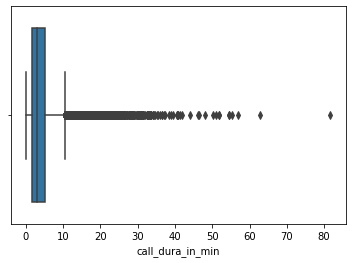

In [ ]:
sns.boxplot(data = df ,x ='call_dura_in_min')

In [ ]:
df[df['call_dura_in_min']==df['call_dura_in_min'].max()]

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,call_dura_in_min
29280,56.0,technician,married,tertiary,no,6572.0,yes,no,telephone,10,nov,1.0,0,unknown,0,81.666667


In [ ]:
df.drop(29280, axis=0 , inplace=True)

### convert day_month  into  3 bins
 <11 , 10:20 , >20

In [ ]:
df["day_of_month"].sort_values(ascending=False).unique()

array([31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1],
      dtype=int64)

In [ ]:
bins=[0,10,20,31]
labels= ['<11','10:20', ' >20']
df['day_month_binned']= pd.cut(df['day_of_month'], bins=bins, labels=labels)

In [ ]:
df['day_month_binned'].value_counts()

10:20    12879
<11       9549
 >20      9138
Name: day_month_binned, dtype: int64

## featuer engneering 

In [ ]:
# create new featuer (new_client_contact_this_campaign)
df[df['num_contacts_prev_campaign']==0]

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,call_dura_in_min,day_month_binned
0,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,4.0,0,unknown,0,5.050000,>20
2,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,4.0,0,unknown,0,1.683333,<11
3,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,3.0,0,unknown,0,2.116667,10:20
4,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,2.0,0,unknown,0,0.816667,10:20
5,65.0,retired,married,primary,no,2880.0,no,no,cellular,23,apr,1.0,0,unknown,1,2.716667,>20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31639,40.0,entrepreneur,married,tertiary,no,2.0,yes,yes,cellular,2,feb,4.0,0,unknown,0,14.200000,<11
31643,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,7.0,0,unknown,0,0.516667,10:20
31644,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,2.0,0,unknown,0,1.483333,>20
31645,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,6.0,0,unknown,0,3.600000,10:20


In [ ]:
def func(x):
    if x==0:
        x=1
        return x
    else :
        x=0
        return x 
        

In [ ]:
df['new_client_contact_this_campaign']=df['num_contacts_prev_campaign'].apply(func)

In [ ]:
df['new_client_contact_this_campaign']

0        1
1        0
2        1
3        1
4        1
        ..
31642    0
31643    1
31644    1
31645    1
31646    1
Name: new_client_contact_this_campaign, Length: 31566, dtype: int64

## Bivariant analysis

In [ ]:
df.select_dtypes('object').columns 

Index(['job_type', 'marital', 'education', 'default', 'housing_loan',
       'personal_loan', 'communication_type', 'month',
       'prev_campaign_outcome'],
      dtype='object')

In [ ]:
cat_col=['job_type', 'marital', 'education', 'default', 'housing_loan',
       'personal_loan', 'communication_type', 'month',
       'prev_campaign_outcome','day_month_binned' ]

<AxesSubplot:xlabel='job_type', ylabel='count'>

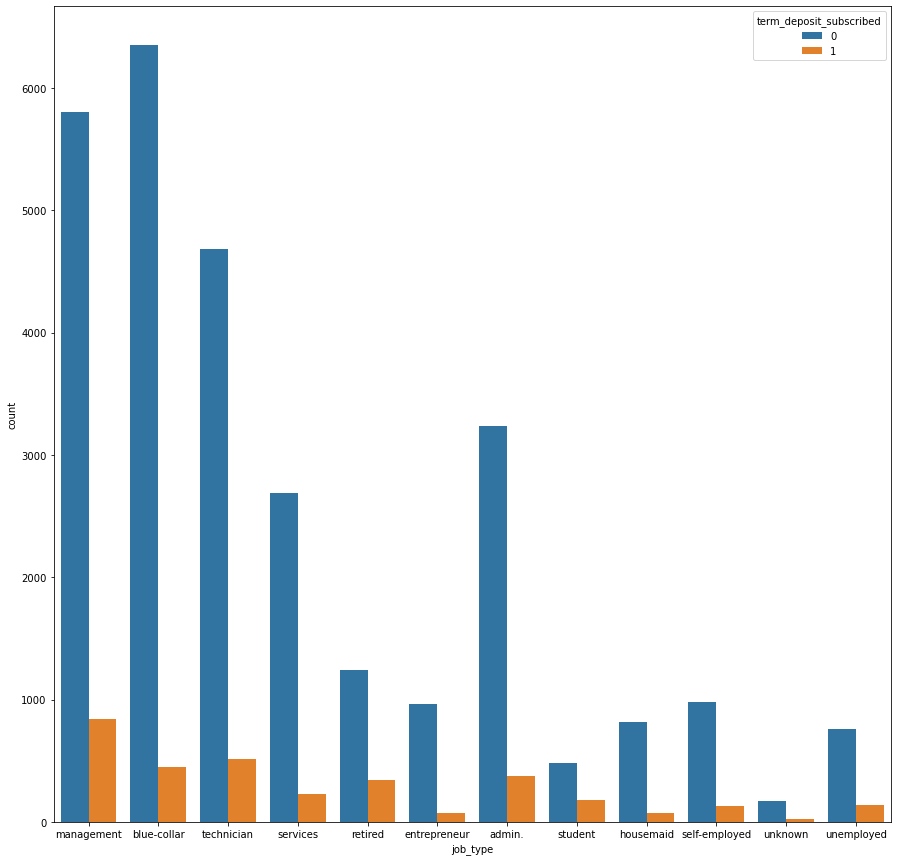

In [ ]:
plt.figure(figsize = (15, 15))
sns.countplot(data=df , x= 'job_type', hue= 'term_deposit_subscribed')

<AxesSubplot:xlabel='marital', ylabel='count'>

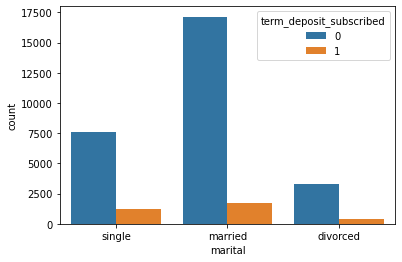

In [ ]:
sns.countplot(data=df , x= 'marital', hue= 'term_deposit_subscribed')

<AxesSubplot:xlabel='education', ylabel='count'>

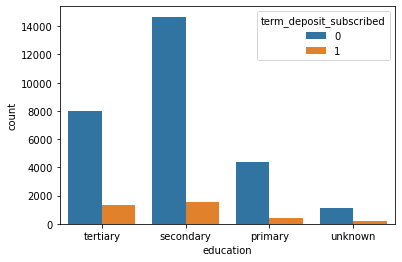

In [ ]:
sns.countplot(data=df , x= 'education',hue='term_deposit_subscribed')

<AxesSubplot:xlabel='default', ylabel='count'>

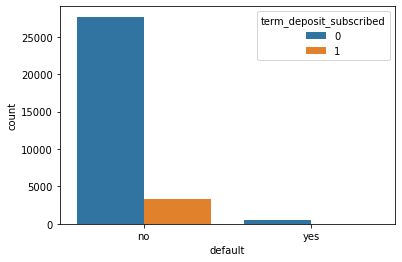

In [ ]:
sns.countplot(data=df , x= 'default', hue='term_deposit_subscribed')

In [ ]:
df.groupby('default').term_deposit_subscribed.value_counts()

default  term_deposit_subscribed
no       0                          27665
         1                           3350
yes      0                            517
         1                             34
Name: term_deposit_subscribed, dtype: int64

<AxesSubplot:xlabel='housing_loan', ylabel='count'>

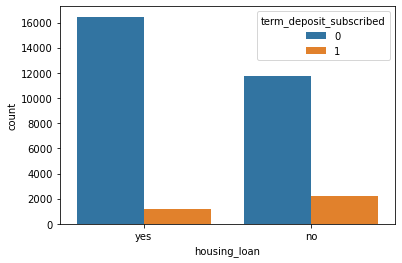

In [ ]:
sns.countplot(data=df , x= 'housing_loan', hue='term_deposit_subscribed')

<AxesSubplot:xlabel='personal_loan', ylabel='count'>

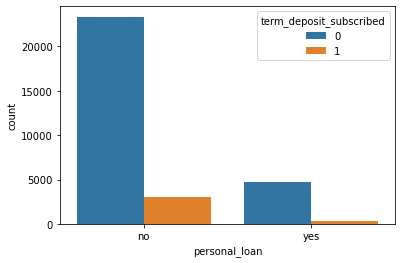

In [ ]:
sns.countplot(data=df , x= 'personal_loan', hue='term_deposit_subscribed')

<AxesSubplot:xlabel='communication_type', ylabel='count'>

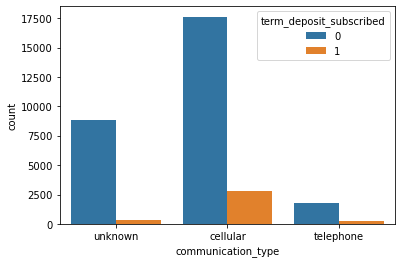

In [ ]:
sns.countplot(data=df , x= 'communication_type', hue='term_deposit_subscribed')

<AxesSubplot:xlabel='month', ylabel='count'>

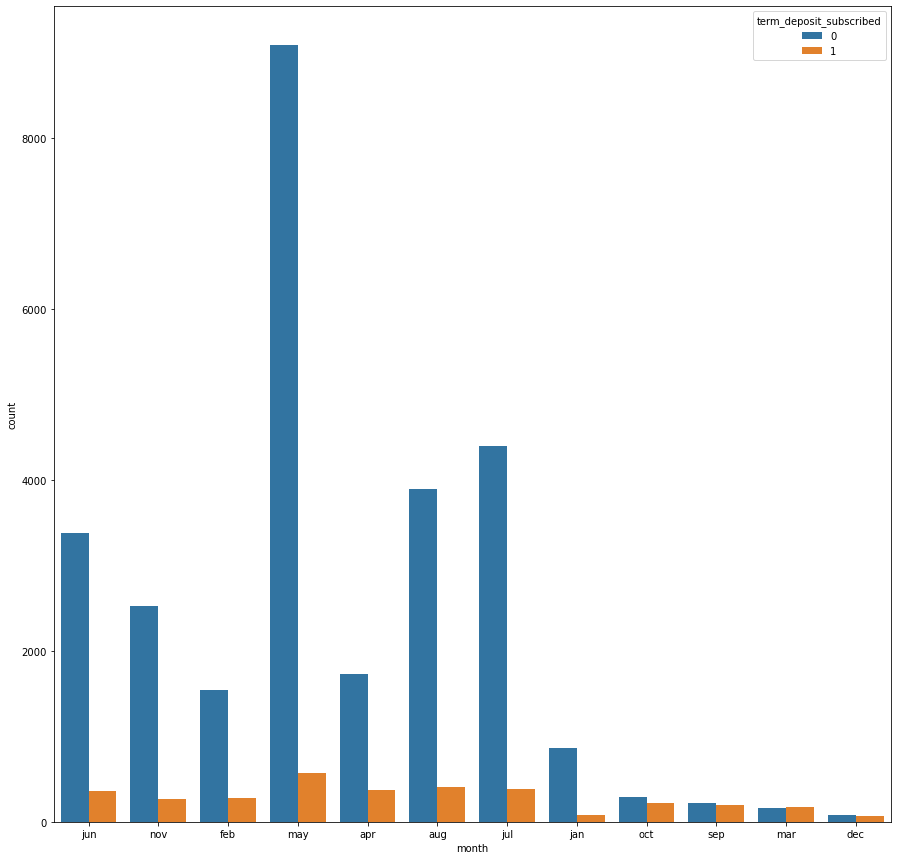

In [ ]:

plt.figure(figsize = (15, 15))
sns.countplot(data=df , x= 'month', hue='term_deposit_subscribed')

<AxesSubplot:xlabel='prev_campaign_outcome', ylabel='count'>

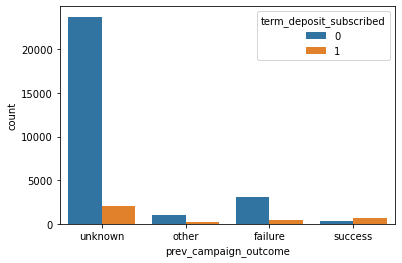

In [ ]:
sns.countplot(data=df , x= 'prev_campaign_outcome', hue='term_deposit_subscribed')

<AxesSubplot:xlabel='day_month_binned', ylabel='count'>

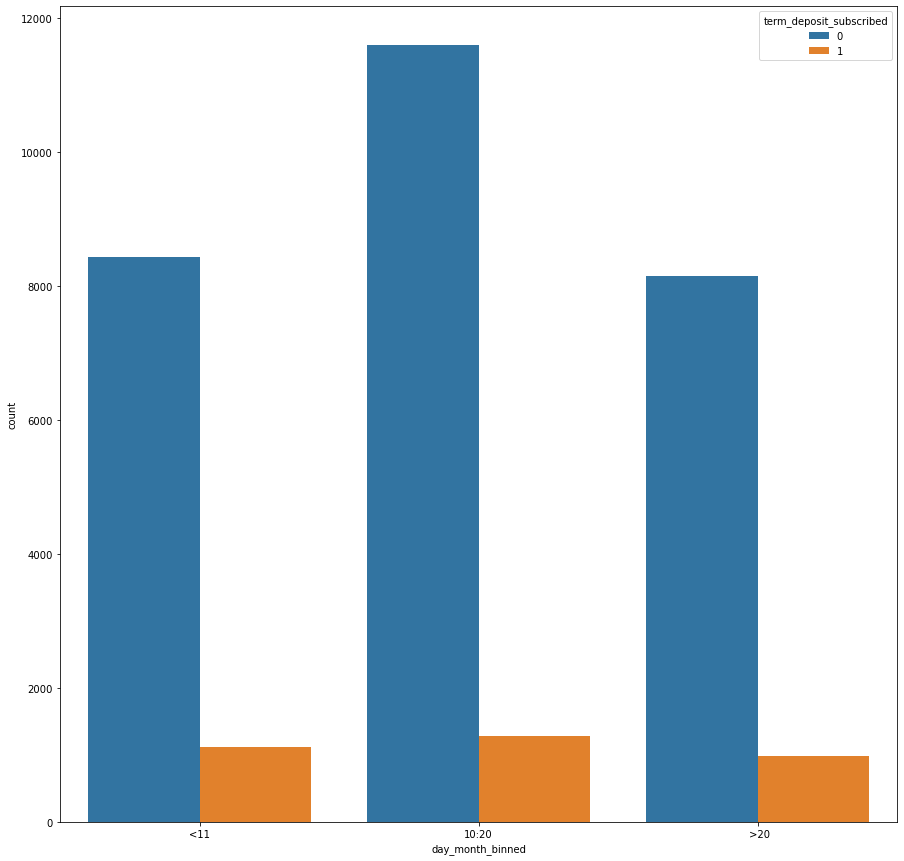

In [ ]:
plt.figure(figsize = (15, 15))

sns.countplot(data=df , x= 'day_month_binned', hue='term_deposit_subscribed')

In [ ]:
num_col=['customer_age', 'balance','num_contacts_in_campaign', 'num_contacts_prev_campaign','call_dura_in_min']

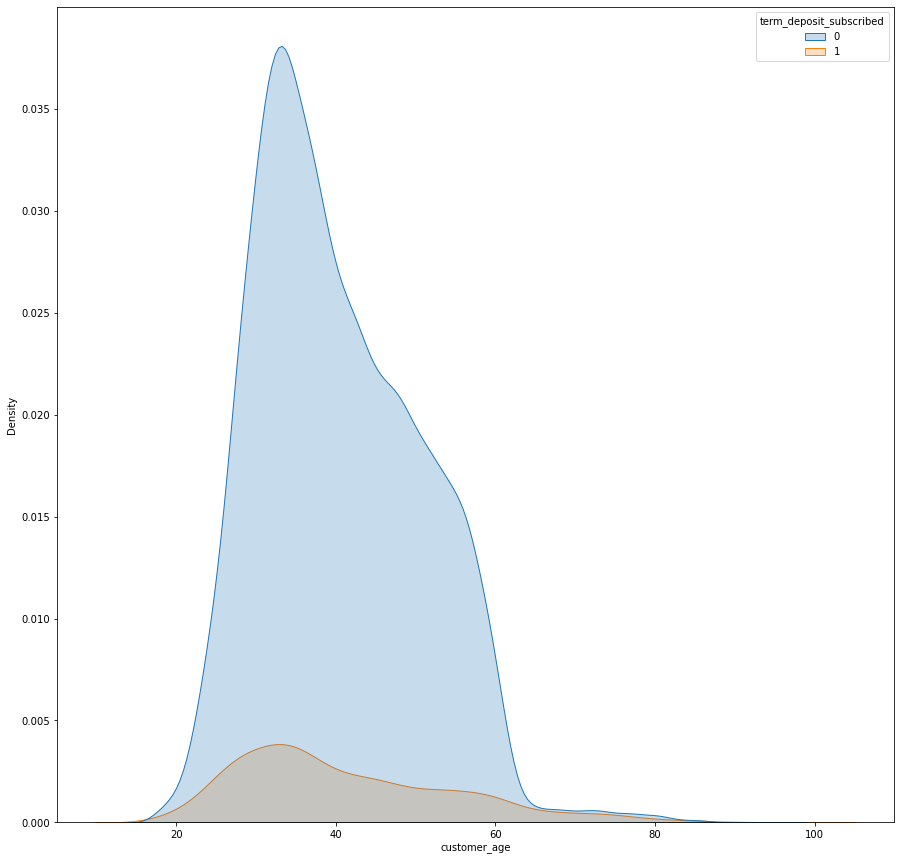

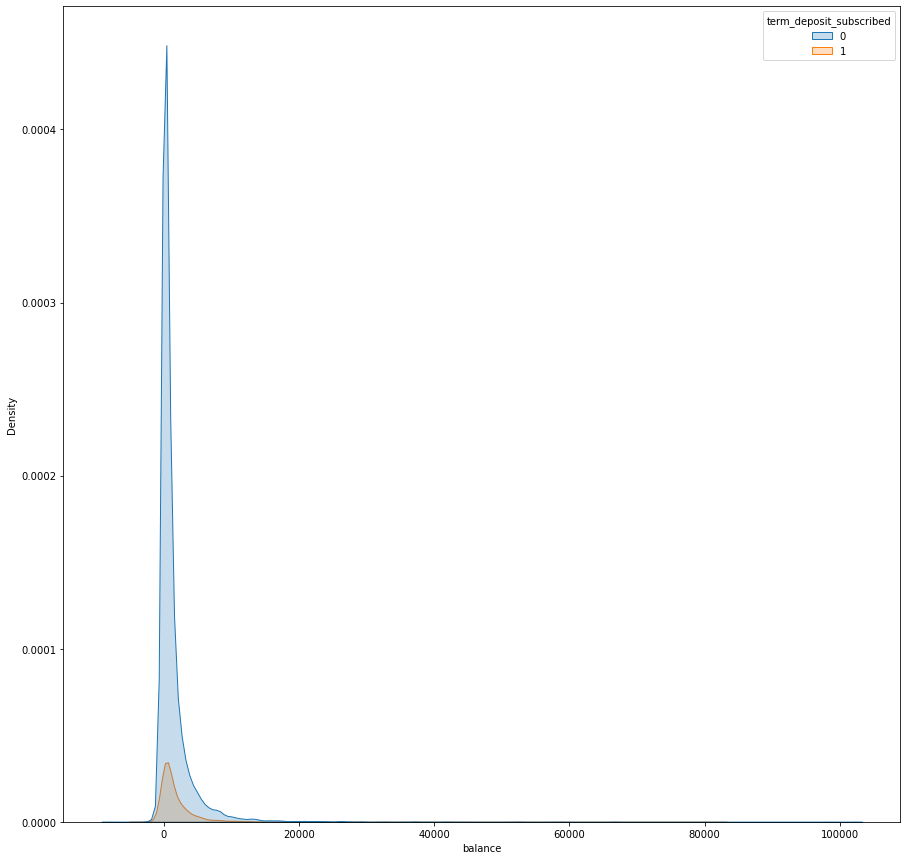

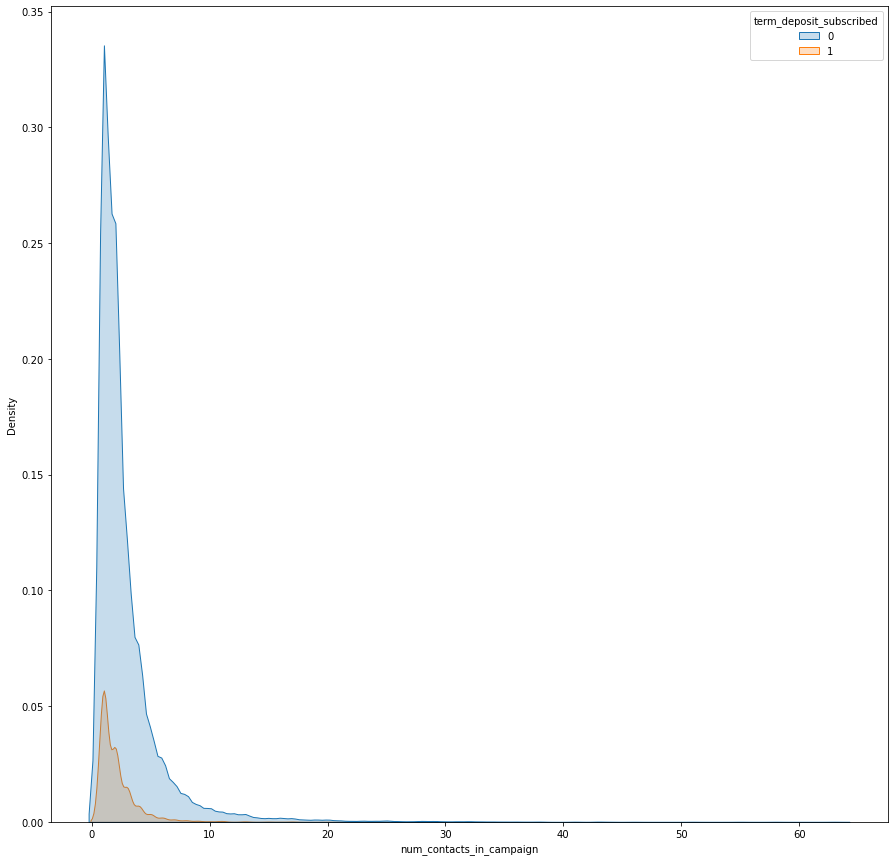

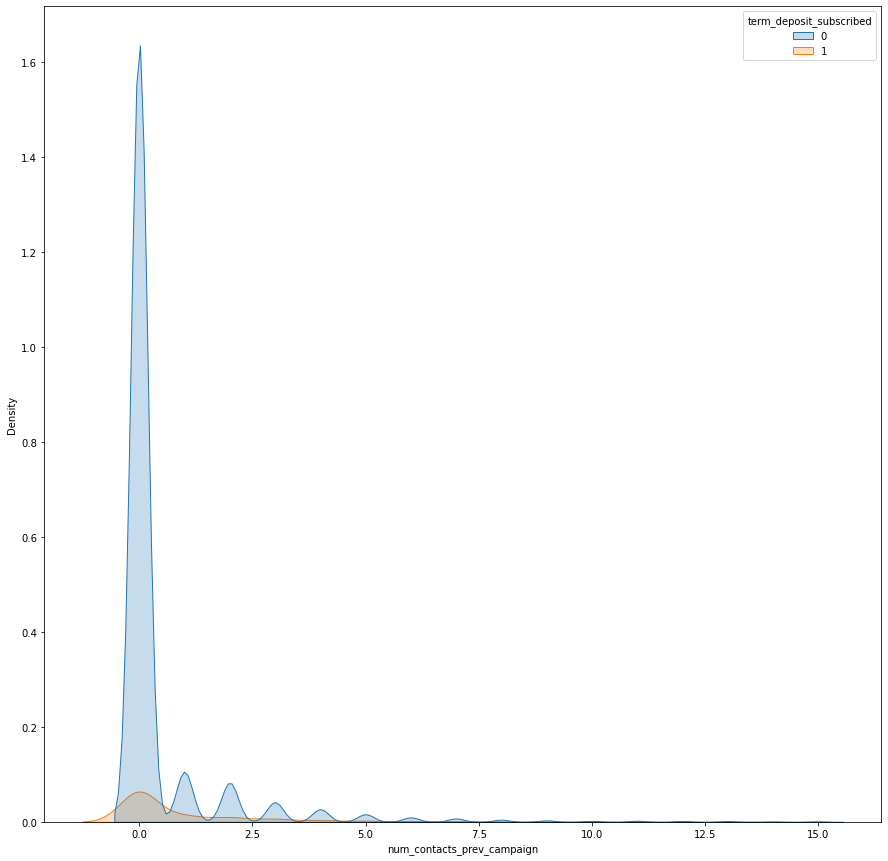

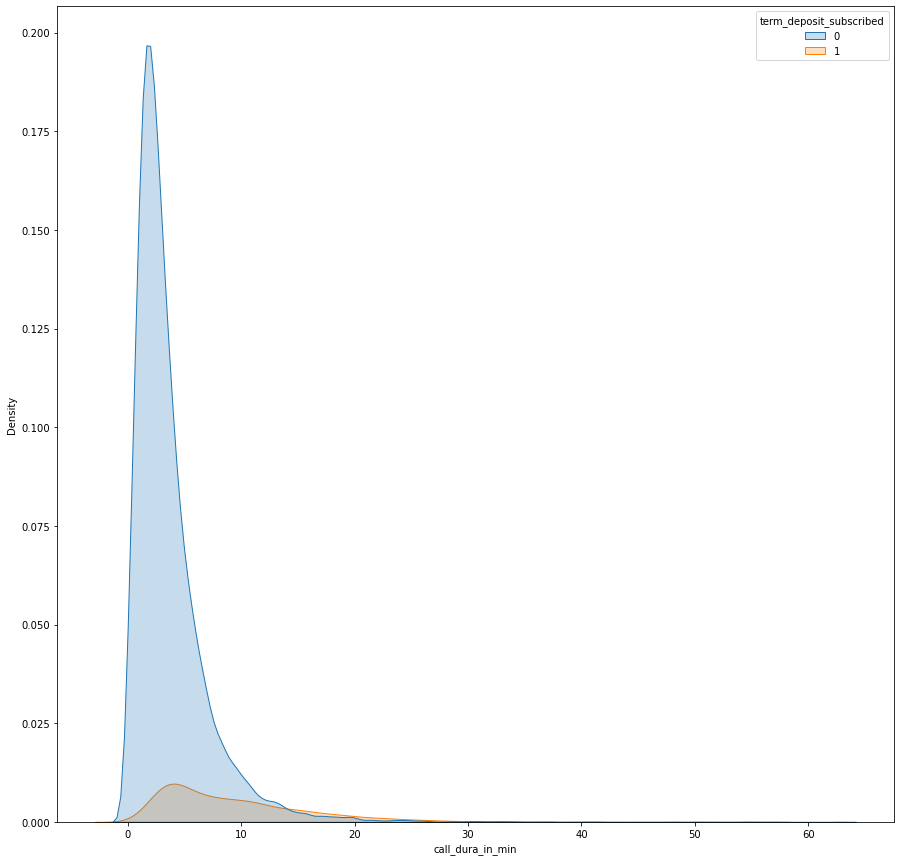

In [ ]:
for col in num_col:
    plt.figure(figsize = (15, 15))
    sns.kdeplot(data=df , x=col , hue='term_deposit_subscribed',shade=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31566 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   customer_age                      30948 non-null  float64 
 1   job_type                          31566 non-null  object  
 2   marital                           31416 non-null  object  
 3   education                         31566 non-null  object  
 4   default                           31566 non-null  object  
 5   balance                           31168 non-null  float64 
 6   housing_loan                      31566 non-null  object  
 7   personal_loan                     31417 non-null  object  
 8   communication_type                31566 non-null  object  
 9   day_of_month                      31566 non-null  int64   
 10  month                             31566 non-null  object  
 11  num_contacts_in_campaign          31454 non-null  floa

In [ ]:
df.reset_index(drop='frist',inplace=True)

## some visuals

<AxesSubplot:>

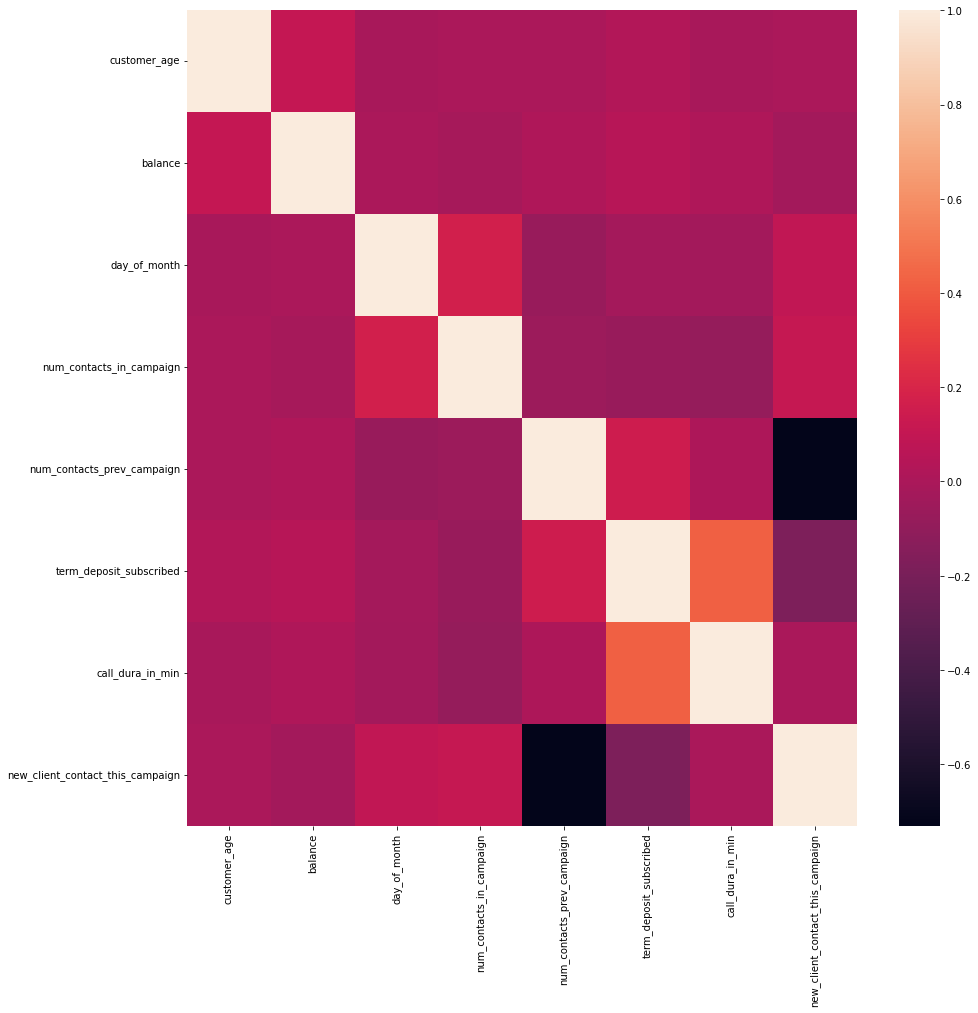

In [ ]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr())

<AxesSubplot:xlabel='call_dura_in_min', ylabel='balance'>

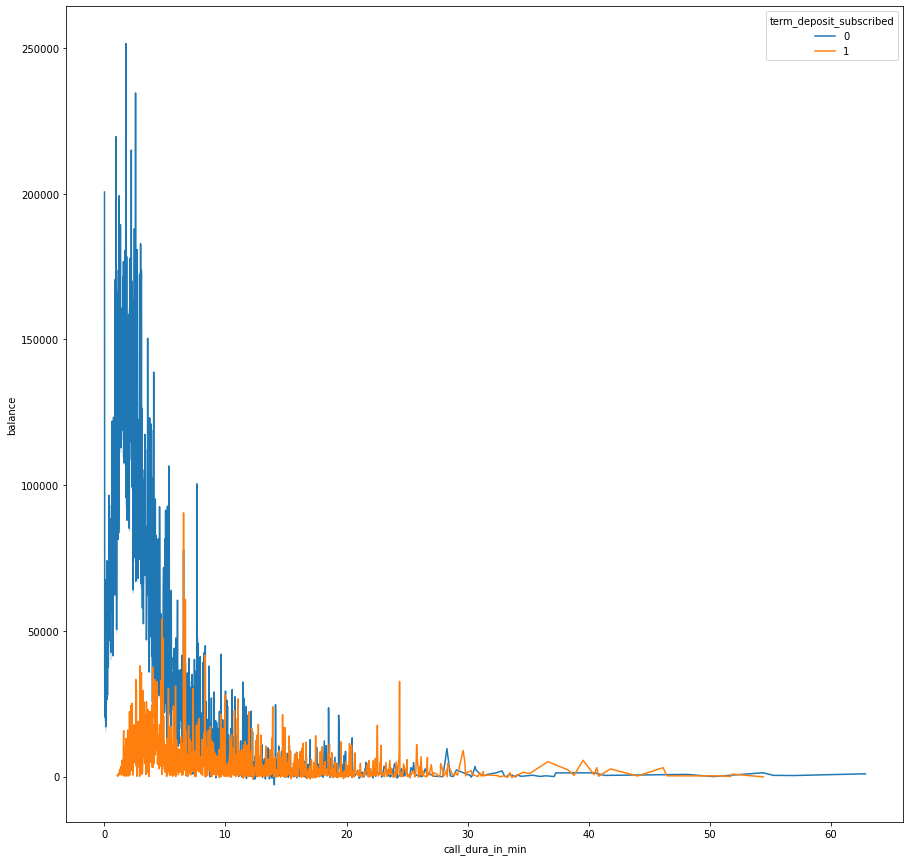

In [ ]:
plt.figure(figsize = (15, 15))
sns.lineplot(data=df, x='call_dura_in_min', y='balance',  hue='term_deposit_subscribed', estimator=sum , ci = True)

<AxesSubplot:xlabel='call_dura_in_min', ylabel='balance'>

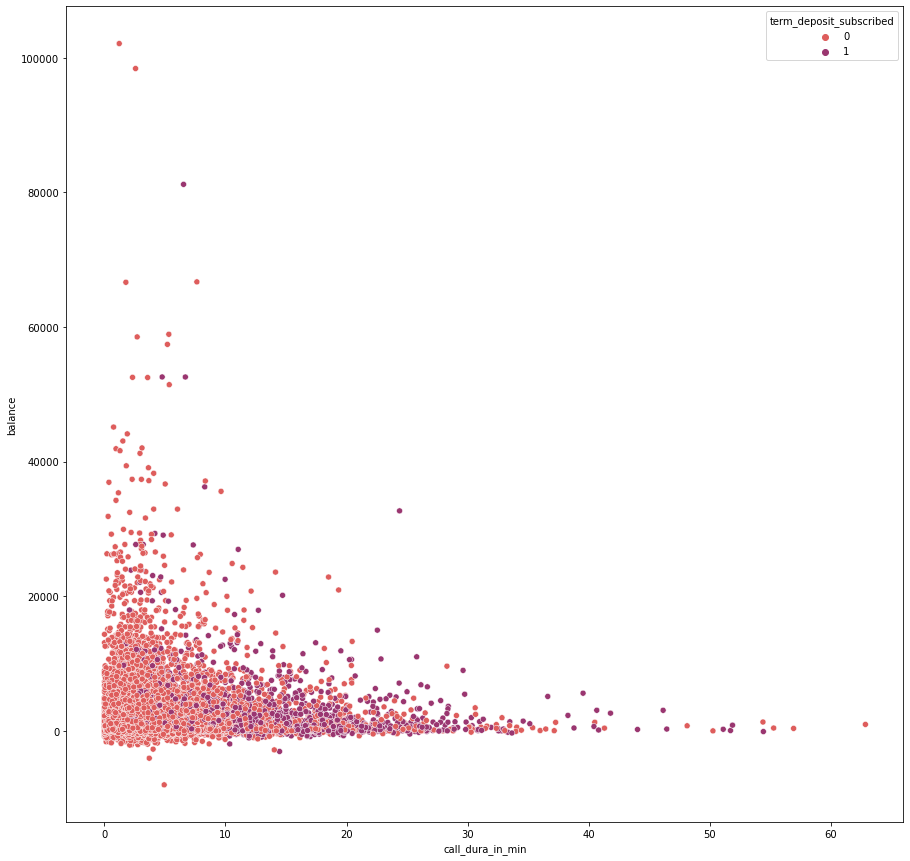

In [ ]:
plt.figure(figsize = (15, 15))
sns.scatterplot(data = df , x = "call_dura_in_min" , y ="balance" , hue = "term_deposit_subscribed" , palette="flare")

### 1) what is the amount of balance for each job_type?

<AxesSubplot:xlabel='job_type', ylabel='balance'>

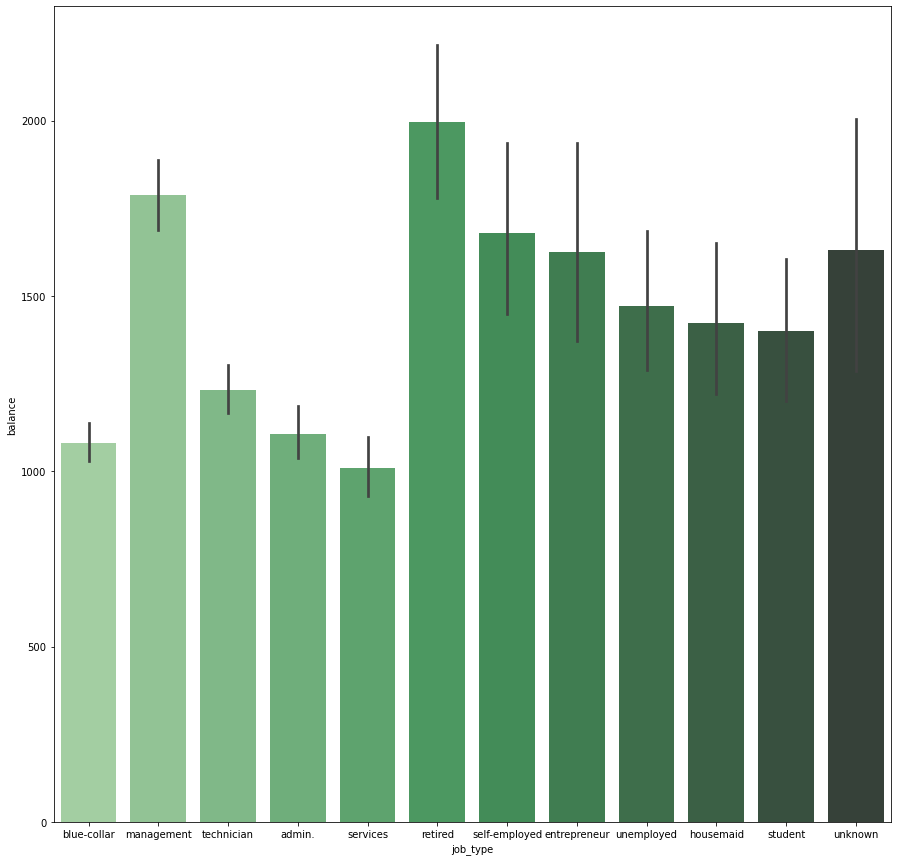

In [ ]:
plt.figure(figsize = (15, 15))
sns.barplot(data=df, x='job_type', y='balance', order=pd.value_counts(df['job_type']).index, palette='Greens_d')

retired , managemant , unknown , blue_collar , technician

### 2) what is the highest category in job_type subscribe to deposit ?

In [ ]:
x = pd.pivot_table(data = df , columns= 'term_deposit_subscribed' , index ='job_type' , values ='balance' )

In [ ]:
x

term_deposit_subscribed,0,1
job_type,,
admin.,1050.510818,1584.960000
blue-collar,1070.019968,1227.541203
entrepreneur,1564.059874,2414.346667
housemaid,1381.329616,1901.164384
management,1733.794774,2171.061298
retired,1782.896806,2769.079646
self-employed,1548.307851,2654.323077
services,1001.957815,1109.729258
student,1352.482180,1528.804598


<AxesSubplot:xlabel='term_deposit_subscribed', ylabel='job_type'>

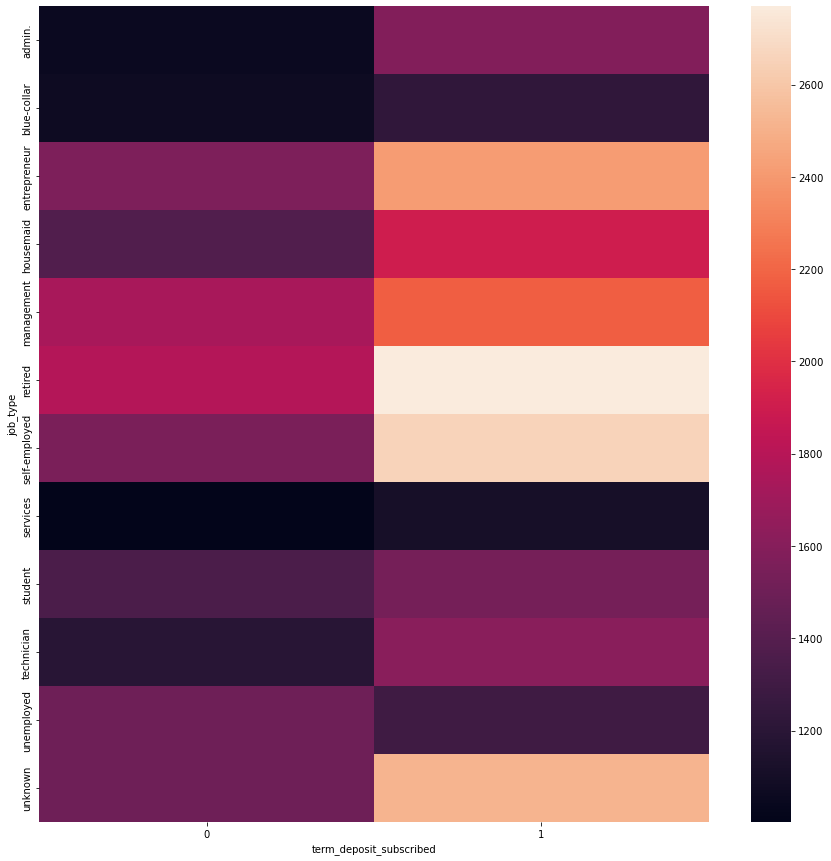

In [ ]:
plt.figure(figsize = (15, 15))
sns.heatmap(x)

retired and self-employed are the most category have highest  deposite and average balance 

### 3)  is there a corrolation between the call duration and the confirmed deposit ? 

In [ ]:
df[['call_dura_in_min','term_deposit_subscribed']].corr()

,call_dura_in_min,term_deposit_subscribed
call_dura_in_min,1.000000,0.418955
term_deposit_subscribed,0.418955,1.000000


### 4) call_duration less than 4 mins indicate that deposit not subscribed

<AxesSubplot:xlabel='term_deposit_subscribed', ylabel='call_dura_in_min'>

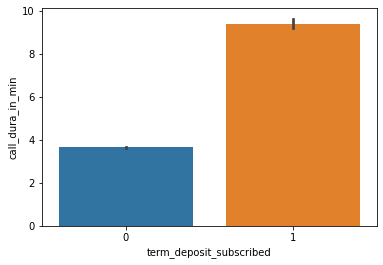

In [ ]:
sns.barplot(data = df , x='term_deposit_subscribed' , y='call_dura_in_min' )

### 5) single category is most make deposit in this campagin then divorced then married

In [ ]:
df.groupby('marital').term_deposit_subscribed.value_counts()

marital   term_deposit_subscribed
divorced  0                           3293
          1                            390
married   0                          17144
          1                           1760
single    0                           7607
          1                           1222
Name: term_deposit_subscribed, dtype: int64

<AxesSubplot:xlabel='marital', ylabel='count'>

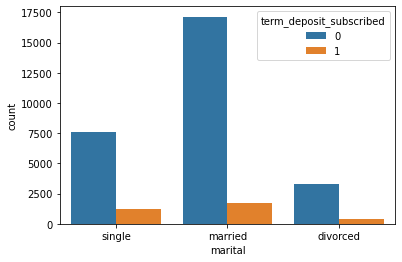

In [ ]:
sns.countplot(data=df , x= 'marital', hue= 'term_deposit_subscribed')

### 6) what is the status of calls above 10 min? 

In [ ]:
df[df['call_dura_in_min']>10].term_deposit_subscribed.value_counts()

0    1293
1    1255
Name: term_deposit_subscribed, dtype: int64

### 7) num_contacts_in_campaign >5 times is  always tend deposit  not subscribed

In [ ]:
df[(df['num_contacts_in_campaign']>5)& (df['term_deposit_subscribed']==1)].shape[0]

155

In [ ]:
df[(df['num_contacts_in_campaign']>5)& (df['term_deposit_subscribed']==0)].shape[0]

2882

### 8) from the pre_campaign how many client make deposit in this campaign ??

In [ ]:
df.groupby('prev_campaign_outcome').term_deposit_subscribed.value_counts()

prev_campaign_outcome  term_deposit_subscribed
failure                0                           3045
                       1                            390
other                  0                           1050
                       1                            181
success                1                            711
                       0                            357
unknown                0                          23730
                       1                           2102
Name: term_deposit_subscribed, dtype: int64

### 9) if the call_duraition equal zero it make sense that term_deposit_subscribed will equal zero cuase the call doesn't occer 

In [ ]:
df[df['call_dura_in_min']==0].term_deposit_subscribed.value_counts()

0    194
Name: term_deposit_subscribed, dtype: int64

### 10) how many new clients we contacts in this campaign ?

In [ ]:
df[df['new_client_contact_this_campaign']==1].shape[0] 

25830

25830 is the same number of term unkown in pre_campaign outcome and this explain that these users are new contacts

### 11) and how many of them deposit is  subscribed ??

In [ ]:
df[df['new_client_contact_this_campaign']==1].term_deposit_subscribed.value_counts()

0    23729
1     2101
Name: term_deposit_subscribed, dtype: int64

### 12) how many of customer age above 60  subscribed  deposit  ???? and what about pre_compaign 

In [ ]:
df[df['customer_age']>60].shape[0]

954

In [ ]:
df[(df['customer_age']>60 )& (df['term_deposit_subscribed']==1)].shape[0]

337

In [ ]:
df[(df['customer_age']>60 )& (df['prev_campaign_outcome']=='success')].shape[0]

142

### 13) age between [30,60]

In [ ]:
df[((30<df['customer_age'])&(df['customer_age']<60))] .term_deposit_subscribed.value_counts()

0    21943
1     2161
Name: term_deposit_subscribed, dtype: int64

In [ ]:
df[((30<df['customer_age'])&(df['customer_age']<60))] .prev_campaign_outcome.value_counts()

unknown    19862
failure     2683
other        890
success      669
Name: prev_campaign_outcome, dtype: int64

### 14)  number of client has balance<=0

In [ ]:
df[df['balance']<=0].shape[0]

4201

### 15 which month has high number of calles

<AxesSubplot:xlabel='month', ylabel='count'>

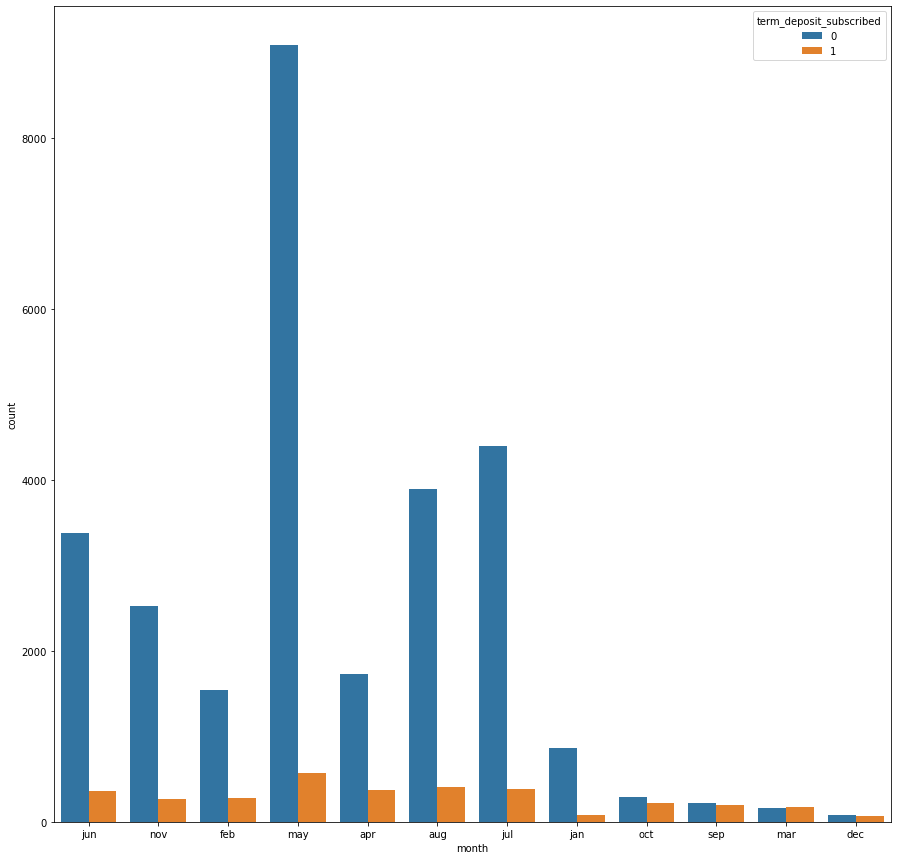

In [ ]:
plt.figure(figsize = (15, 15))
sns.countplot(data=df , x= 'month', hue='term_deposit_subscribed')

In [ ]:
df.groupby('month').term_deposit_subscribed.value_counts().sort_values(ascending= False)

month  term_deposit_subscribed
may    0                          9087
jul    0                          4403
aug    0                          3890
jun    0                          3382
nov    0                          2530
apr    0                          1730
feb    0                          1545
jan    0                           860
may    1                           574
aug    1                           413
jul    1                           379
apr    1                           373
jun    1                           360
oct    0                           288
feb    1                           283
nov    1                           261
sep    0                           221
oct    1                           218
sep    1                           195
mar    1                           174
       0                           164
dec    0                            82
jan    1                            82
dec    1                            72
Name: term_deposit_subscribed, dt

In [ ]:
df.drop(['day_of_month'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31566 entries, 0 to 31565
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   customer_age                      30948 non-null  float64 
 1   job_type                          31566 non-null  object  
 2   marital                           31416 non-null  object  
 3   education                         31566 non-null  object  
 4   default                           31566 non-null  object  
 5   balance                           31168 non-null  float64 
 6   housing_loan                      31566 non-null  object  
 7   personal_loan                     31417 non-null  object  
 8   communication_type                31566 non-null  object  
 9   month                             31566 non-null  object  
 10  num_contacts_in_campaign          31454 non-null  float64 
 11  num_contacts_prev_campaign        31566 non-null  int6

In [ ]:
df.to_csv('modifed_data.csv', index=False )

In [ ]:
df['new_client_contact_this_campaign'].value_counts()

1    25830
0     5736
Name: new_client_contact_this_campaign, dtype: int64

310